Importing the Dependencies

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [14]:
# loading the dataset to a Pandas DataFrame
credit_card_data = pd.read_csv('/content/creditcard.csv')

In [15]:
# first 5 rows of the dataset
credit_card_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [17]:
credit_card_data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
39697,39927,-1.466679,2.425732,0.877724,3.950765,0.762477,1.162748,0.575625,-0.288354,-1.357990,...,0.186051,0.571010,-0.107517,-0.754306,-0.752828,0.113179,-2.079421,-0.809173,1.50,0.0
39698,39927,-0.523165,-0.100021,0.892966,-1.900405,-0.156870,-0.783894,0.917683,-0.308345,-1.305284,...,-0.082504,-0.414677,-0.063392,-0.087455,-0.303383,-0.682889,-0.178417,-0.137169,100.92,0.0
39699,39928,-2.768425,-1.007072,2.151127,0.117797,1.283178,1.869731,-0.562240,0.820374,0.348797,...,-0.182963,0.778210,0.904077,-1.288631,0.212441,0.483975,-0.027614,-0.582813,11.99,0.0
39700,39928,1.201327,0.158614,-0.325263,0.471667,0.086446,-0.770357,0.422151,-0.205277,-0.451865,...,0.027664,-0.018485,-0.199382,0.053605,0.683829,0.428416,-0.077342,-0.006394,45.00,0.0
39701,39929,1.097669,-1.315782,0.659681,-0.683915,-1.342612,0.332629,-1.110900,0.194811,-0.248825,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
# dataset informations
credit_card_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39702 entries, 0 to 39701
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    39702 non-null  int64  
 1   V1      39702 non-null  float64
 2   V2      39702 non-null  float64
 3   V3      39702 non-null  float64
 4   V4      39702 non-null  float64
 5   V5      39702 non-null  float64
 6   V6      39702 non-null  float64
 7   V7      39702 non-null  float64
 8   V8      39702 non-null  float64
 9   V9      39702 non-null  float64
 10  V10     39702 non-null  float64
 11  V11     39702 non-null  float64
 12  V12     39702 non-null  float64
 13  V13     39701 non-null  float64
 14  V14     39701 non-null  float64
 15  V15     39701 non-null  float64
 16  V16     39701 non-null  float64
 17  V17     39701 non-null  float64
 18  V18     39701 non-null  float64
 19  V19     39701 non-null  float64
 20  V20     39701 non-null  float64
 21  V21     39701 non-null  float64
 22

In [21]:
credit_card_data.isnull().sum()

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


In [20]:
print(credit_card_data.columns)


Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')


In [22]:
# distribution of legit transactions & fraudulent transactions
credit_card_data['Class'].value_counts()

,count
Class,
0.0,39597
1.0,104


This Dataset is highly unblanced

0 --> Normal Transaction

1 --> fraudulent transaction

In [52]:
credit_card_data['Class'].isnull().sum()



np.int64(1)

In [53]:
credit_card_data = credit_card_data.dropna(subset=['Class'])


In [54]:
credit_card_data['Class'].isnull().sum()


np.int64(0)

In [55]:
# Separate features and target
X = credit_card_data.drop(columns='Class', axis=1)
Y = credit_card_data['Class']

# Split data (keep imbalance)
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.2, stratify=Y, random_state=2
)

print(X.shape, X_train.shape, X_test.shape)


(39701, 30) (31760, 30) (7941, 30)


In [56]:
# Check and clean missing values (if any)
print("Missing values before cleaning:\n", credit_card_data.isnull().sum())

Missing values before cleaning:
 Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


In [57]:
# Drop rows with missing target or features
credit_card_data = credit_card_data.dropna(subset=['Class'])
credit_card_data = credit_card_data.fillna(credit_card_data.median())

In [58]:
# Scale features for better model performance
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [59]:
# Logistic Regression Model with class balancing
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(class_weight='balanced', max_iter=2000, solver='liblinear')

In [60]:
# Train the model
model.fit(X_train_scaled, Y_train)

LogisticRegression(class_weight='balanced', max_iter=2000, solver='liblinear')

In [62]:
# Predict on test data
Y_pred = model.predict(X_test_scaled)
Y_pred_prob = model.predict_proba(X_test_scaled)[:, 1]

In [63]:
# Evaluate Model Performance
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

In [64]:
print("\nConfusion Matrix:")
print(confusion_matrix(Y_test, Y_pred))


Confusion Matrix:
[[7820  100]
 [   3   18]]


In [65]:
print("\nClassification Report:")
print(classification_report(Y_test, Y_pred, digits=4))


Classification Report:
              precision    recall  f1-score   support

         0.0     0.9996    0.9874    0.9935      7920
         1.0     0.1525    0.8571    0.2590        21

    accuracy                         0.9870      7941
   macro avg     0.5761    0.9223    0.6262      7941
weighted avg     0.9974    0.9870    0.9915      7941



In [66]:
roc_auc = roc_auc_score(Y_test, Y_pred_prob)
print(f"ROC-AUC Score: {roc_auc:.4f}")

ROC-AUC Score: 0.9746


In [67]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import RocCurveDisplay

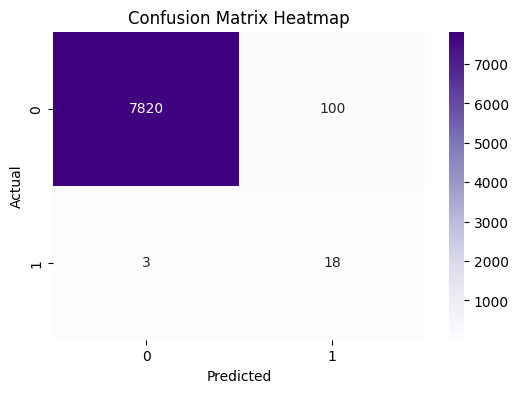

In [68]:
# Confusion Matrix Heatmap
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(Y_test, Y_pred), annot=True, fmt='d', cmap='Purples')
plt.title("Confusion Matrix Heatmap")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


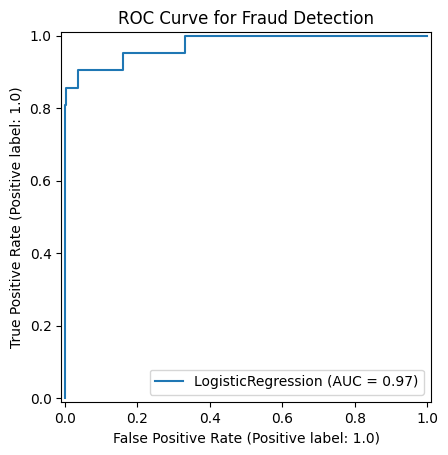

In [69]:
# ROC Curve
RocCurveDisplay.from_estimator(model, X_test_scaled, Y_test)
plt.title("ROC Curve for Fraud Detection")
plt.show()

In [70]:
import joblib

# Saving the trained model
joblib.dump(model, 'fraud_model.pkl')

print("Model saved as fraud_model.pkl")


Model saved as fraud_model.pkl
